In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df=pd.read_csv('regression.csv') #dataframe
X=df.drop('outcome',1)
y=df['outcome']
data.shape
data.head()

C:\Users\youss\AppData\Local\Temp/ipykernel_16644/2490111656.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df.drop('outcome',1)


,year,block,zipcode,xcoord,ycoord,yearbuilt,age,build_alter_gap,alterage,alterage_squared,...,avg_neighbor2_pcvpu_l3,avg_neighbor3_pcvpu_l1,avg_neighbor3_pcvpu_l2,avg_neighbor3_pcvpu_l3,avg_neighbor4_pcvpu_l1,avg_neighbor4_pcvpu_l2,avg_neighbor4_pcvpu_l3,avg_zip_pcvpu_l1,avg_zip_pcvpu_l2,outcome
0,2008,1406,10021,994488,219978,1910,98,0,98,9604,...,2.619000,11.032100,12.550967,1.347125,1.136693,4.655971,3.950815,6.889220,15.954257,8.171566
1,2009,1406,10021,994488,219978,1910,99,0,99,9801,...,18.530027,0.198508,11.032100,12.550967,4.903079,1.136693,4.655971,19.974814,6.889220,15.954257
2,2010,1406,10021,994488,219978,1910,100,0,100,10000,...,15.325811,-0.584319,0.198508,11.032100,2.556886,4.903079,1.136693,4.891324,19.974814,6.889220
3,2011,1406,10021,994488,219978,1910,101,0,101,10201,...,5.413032,-1.101371,-0.584319,0.198508,6.639707,2.556886,4.903079,11.223234,4.891324,19.974814
4,2012,1406,10021,994488,219978,1910,102,0,102,10404,...,4.104781,2.542682,-1.101371,-0.584319,1.458829,6.639707,2.556886,1.549399,11.223234,4.891324


In [14]:

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
           , columns = ['A', 'B','C','D','E'])
finalDf = pd.concat([principalDf,y], axis = 1)

[9.99984362e-01 1.27532305e-05 1.97482060e-06 3.19873207e-07
 1.76578067e-07]


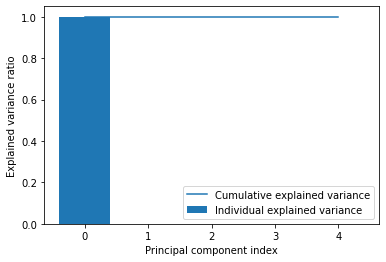

In [15]:
finalDf.to_csv("pcadata.csv",index = False, header=True)
exvar= pca.explained_variance_ratio_
cexvarsum = np.cumsum(exvar)
print(exvar)
plt.bar(range(0,len(exvar)), exvar, label='Individual explained variance')
plt.step(range(0,len(cexvarsum)), cexvarsum ,label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='lower right')

plt.show()

In [20]:


data=pd.read_csv('pcadata.csv')
X=data.drop('outcome',1)
y=data['outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
data.head()

C:\Users\youss\AppData\Local\Temp/ipykernel_16644/2993364089.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=data.drop('outcome',1)


,A,B,C,D,E,outcome
0,602040.077790,-682.166956,-681.107856,-406.910279,0.362681,8.171566
1,631147.692696,-688.550240,-626.623172,-406.226077,2.657730,15.954257
2,660849.302780,-694.950536,-569.114343,-405.443872,4.993271,6.889220
3,691150.907769,-701.420046,-508.319358,-404.660791,7.601629,19.974814
4,722058.507344,-708.031738,-444.310693,-404.210716,10.076478,4.891324


In [30]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators = 10)
# rf.fit(x_train, y_train)


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=5, n_informative=1,
                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
print(regr.predict([[0, 0, 0, 0 , 0]]))



[11.78047752]
